In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# Load file
data = pd.read_csv('data/modeling_data_22.csv',index_col=0)
data.drop(columns = ['course_id', 'userid_DI','course'], inplace = True)
data = data.astype({'YoB': 'int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274040 entries, 0 to 274039
Data columns (total 51 columns):
 #   Column                                                    Non-Null Count   Dtype
---  ------                                                    --------------   -----
 0   YoB                                                       274040 non-null  int64
 1   explored/cert                                             274040 non-null  int64
 2   final_cc_cname_DI_Australia                               274040 non-null  int64
 3   final_cc_cname_DI_Bangladesh                              274040 non-null  int64
 4   final_cc_cname_DI_Brazil                                  274040 non-null  int64
 5   final_cc_cname_DI_Canada                                  274040 non-null  int64
 6   final_cc_cname_DI_China                                   274040 non-null  int64
 7   final_cc_cname_DI_Colombia                                274040 non-null  int64
 8   final_cc_cname_DI_Egypt 

In [39]:
y = data['explored/cert']
X = data.drop(columns=['explored/cert'])

In [40]:
X.shape, y.shape

((274040, 50), (274040,))

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.7)
input_shape = [X_train.shape[1]]

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_shape),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [43]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
375/375 [==============================] - 4s 8ms/step - loss: 0.4225 - binary_accuracy: 0.8437 - val_loss: 0.3361 - val_binary_accuracy: 0.8939
Epoch 2/200
375/375 [==============================] - 3s 8ms/step - loss: 0.3426 - binary_accuracy: 0.8912 - val_loss: 0.3285 - val_binary_accuracy: 0.8939
Epoch 3/200
375/375 [==============================] - 3s 9ms/step - loss: 0.3339 - binary_accuracy: 0.8930 - val_loss: 0.3261 - val_binary_accuracy: 0.8939
Epoch 4/200
375/375 [==============================] - 3s 8ms/step - loss: 0.3304 - binary_accuracy: 0.8935 - val_loss: 0.3256 - val_binary_accuracy: 0.8939
Epoch 5/200
375/375 [==============================] - 3s 8ms/step - loss: 0.3295 - binary_accuracy: 0.8936 - val_loss: 0.3252 - val_binary_accuracy: 0.8939
Epoch 6/200
375/375 [==============================] - 3s 8ms/step - loss: 0.3279 - binary_accuracy: 0.8937 - val_loss: 0.3265 - val_binary_accuracy: 0.8939
Epoch 7/200
375/375 [==============================] - 3s 

<AxesSubplot:title={'center':'Accuracy'}>

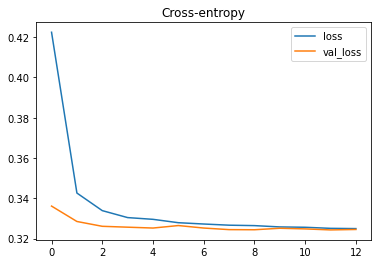

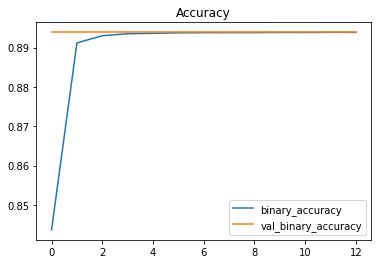

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [54]:
#evaluate the model
yhat = model.predict(X_valid)
yhat = yhat.round()
acc = accuracy_score(y_valid, yhat)
print('>%.3f' % acc)

>0.894
